In [1]:
# 1.0 Reset memory
#%reset -f
# 1.1 Call libraries

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder 

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder

## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [2]:
# 2.0 Import warnings module
#     No FutureWarnings display
 
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

In [3]:
abc = pd.read_csv("C:\\Users\\arpit\\Downloads\\sample.csv")

In [4]:
df = abc.sample(100)
# print the shape of the dataframe

print("Dataframe shape:", df.shape)

Dataframe shape: (100, 24)


In [5]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
4063,6.585440e+18,0,14102104,1005,0,85f751fd,c4e18dd6,50e219e0,e7cf2855,ae637522,...,1,2,21234,320,50,2434,3,163,100088,61
986,1.459000e+19,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,-1,79
1183,1.119520e+19,0,14102104,1010,1,85f751fd,c4e18dd6,50e219e0,19e6e972,7801e8d9,...,4,3,21154,320,50,2420,2,35,-1,69
3979,1.651150e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,21611,320,50,2480,3,299,100111,61
3454,4.791790e+18,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,...,1,0,19743,320,50,2264,3,427,100000,61


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4063 to 1612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    float64
 1   click             100 non-null    int64  
 2   hour              100 non-null    int64  
 3   C1                100 non-null    int64  
 4   banner_pos        100 non-null    int64  
 5   site_id           100 non-null    object 
 6   site_domain       100 non-null    object 
 7   site_category     100 non-null    object 
 8   app_id            100 non-null    object 
 9   app_domain        100 non-null    object 
 10  app_category      100 non-null    object 
 11  device_id         100 non-null    object 
 12  device_ip         100 non-null    object 
 13  device_model      100 non-null    object 
 14  device_type       100 non-null    int64  
 15  device_conn_type  100 non-null    int64  
 16  C14               100 non-null    int64 

In [7]:
def count_unique(d, columns):
    for column in columns:
        print("Number of Unique values in column {} is {}".format(column, str(len(d[column].unique()))))

In [8]:
columns = list(df.columns)
count_unique(df, columns)

Number of Unique values in column id is 100
Number of Unique values in column click is 2
Number of Unique values in column hour is 6
Number of Unique values in column C1 is 5
Number of Unique values in column banner_pos is 4
Number of Unique values in column site_id is 27
Number of Unique values in column site_domain is 23
Number of Unique values in column site_category is 5
Number of Unique values in column app_id is 31
Number of Unique values in column app_domain is 7
Number of Unique values in column app_category is 5
Number of Unique values in column device_id is 22
Number of Unique values in column device_ip is 99
Number of Unique values in column device_model is 69
Number of Unique values in column device_type is 3
Number of Unique values in column device_conn_type is 3
Number of Unique values in column C14 is 46
Number of Unique values in column C15 is 2
Number of Unique values in column C16 is 3
Number of Unique values in column C17 is 30
Number of Unique values in column C18 i

# Feature engineering

In [9]:
print(df.isnull().sum().sum())

0


In [10]:
#Drop the ID Column
df.drop('id',axis=1,inplace = True)

In [11]:
# Finding Correlation,
corrMatrix=df.corr()
corrMatrix

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
click,1.000000,0.063245,-0.185010,-0.017376,-0.147674,-0.092378,0.012751,-0.043473,-0.004219,-0.061326,0.030426,0.278957,0.037157,-0.144363
hour,0.063245,1.000000,0.056247,-0.007531,-0.018373,0.065333,0.033434,0.034031,-0.061716,0.069714,0.277767,0.099415,0.016618,-0.259147
C1,-0.185010,0.056247,1.000000,0.490912,0.776438,0.263525,0.147020,0.026029,0.271071,0.229435,0.088247,0.028393,-0.014237,0.217969
banner_pos,-0.017376,-0.007531,0.490912,1.000000,0.515721,-0.033942,0.158467,0.060971,0.515882,0.157325,-0.026765,0.171259,0.053311,0.290908
device_type,-0.147674,-0.018373,0.776438,0.515721,1.000000,0.181615,0.118120,0.022496,0.389009,0.181633,0.009815,-0.009593,-0.095824,0.296138
device_conn_type,-0.092378,0.065333,0.263525,-0.033942,0.181615,1.000000,-0.009138,0.073840,-0.077481,0.008054,0.067017,0.048693,-0.097700,-0.008798
C14,0.012751,0.033434,0.147020,0.158467,0.118120,-0.009138,1.000000,-0.010402,0.069175,0.930281,0.337500,0.202526,0.166455,0.058861
C15,-0.043473,0.034031,0.026029,0.060971,0.022496,0.073840,-0.010402,1.000000,-0.667194,-0.022067,-0.093924,0.124666,-0.028990,0.194630
C16,-0.004219,-0.061716,0.271071,0.515882,0.389009,-0.077481,0.069175,-0.667194,1.000000,0.076418,-0.012588,-0.026964,0.105899,0.123707
C17,-0.061326,0.069714,0.229435,0.157325,0.181633,0.008054,0.930281,-0.022067,0.076418,1.000000,0.311161,0.228425,0.119424,0.062415


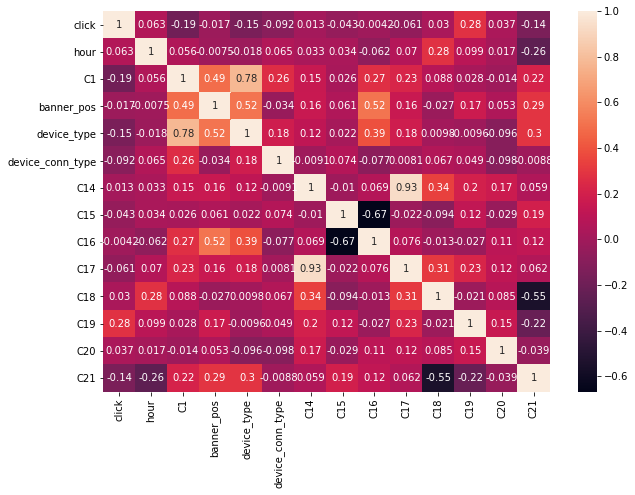

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Drop irrelevent columns


In [13]:
df.drop('device_id',axis=1,inplace = True)
df.drop('device_ip',axis=1,inplace = True)
df.drop('hour',axis=1,inplace = True)

In [14]:
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
4063,0,1005,0,85f751fd,c4e18dd6,50e219e0,e7cf2855,ae637522,0f2161f8,c517f57b,1,2,21234,320,50,2434,3,163,100088,61
986,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,1ccc7835,1,0,15703,320,50,1722,0,35,-1,79
1183,0,1010,1,85f751fd,c4e18dd6,50e219e0,19e6e972,7801e8d9,cef3e649,d2e497d6,4,3,21154,320,50,2420,2,35,-1,69
3979,0,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a4b6f65b,1,0,21611,320,50,2480,3,299,100111,61
3454,0,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,1b8a6145,1,0,19743,320,50,2264,3,427,100000,61


# Pipeline

In [15]:

# Which columns are numeric and which not
num_cols = ['C1','C14','C15','C16','C17','C18','C19','C20','C21']
cat_cols = ['banner_pos','site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model','device_type','device_conn_type'] 

In [16]:
# Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss', StandardScaler()) ])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder())])

In [17]:
# Test each pipe
nc_pipe.fit_transform(df[num_cols])
cat_pipe.fit_transform(df[cat_cols])

<100x177 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [18]:
#fitting cat
ct = ColumnTransformer([ ('nc', nc_pipe, num_cols), ('cp', cat_pipe,cat_cols)])

In [19]:
ct.fit_transform(df)

<100x186 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [20]:
pt = Pipeline([ ('ct', ct), ('dt', DecisionTreeClassifier())])

In [21]:
# Your train data
#loss is removed
y_train = df.pop('click')
X_train = df

In [22]:
# Fit final pipe on the data
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['C1', 'C14', 'C15', 'C16',
                                                   'C17', 'C18', 'C19', 'C20',
                                                   'C21']),
                                                 ('cp',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                

In [23]:
# Make predictions
pt.predict(X_train)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['C1', 'C14', 'C15', 'C16',
                                                   'C17', 'C18', 'C19', 'C20',
                                                   'C21']),
                                                 ('cp',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['banner_pos', 'site_id',
                                                   'site_domain',
                                                   'site_category', 'app_id',
                                                   'app_domain', 'app_category',
                                                   'device_model',
                                                   'device_type',
                                                   'device_conn_type'])])),
                ('dt', DecisionTreeClassifier())])

# Cross Vaidation

In [25]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [26]:
X=df

In [27]:
lab = ['banner_pos','site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_model','device_type','device_conn_type']

In [28]:
X[lab]=X[lab].apply(label_encoder.fit_transform)

In [29]:
from sklearn.model_selection import cross_val_score



In [30]:
pip install scikit_optimize

Note: you may need to restart the kernel to use updated packages.


In [31]:
from skopt import BayesSearchCV


In [32]:
from skopt.space import Real, Categorical, Integer

In [33]:
from sklearn.model_selection import StratifiedKFold
cvStrategy = StratifiedKFold(
                             n_splits=3,
                             shuffle=True,
                             random_state=42
                            )

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

list of models are as follows

In [35]:
models = [LogisticRegression(max_iter=5), KNeighborsClassifier(), RandomForestClassifier()]

In [36]:
df.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
4063,1005,0,15,18,2,29,4,1,55,1,1,21234,320,50,2434,3,163,100088,61
986,1005,0,2,22,0,30,3,0,6,1,0,15703,320,50,1722,0,35,-1,79
1183,1010,1,15,18,2,2,3,3,61,2,2,21154,320,50,2420,2,35,-1,69
3979,1005,0,15,18,2,20,6,1,43,1,0,21611,320,50,2480,3,299,100111,61
3454,1005,0,15,18,2,12,5,1,5,1,0,19743,320,50,2264,3,427,100000,61


In [37]:
y=y_train

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

In [39]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)
    
    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [40]:
from sklearn.metrics import accuracy_score
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=5)  =  0.85
Accuracy score of the  KNeighborsClassifier()  =  0.85
Accuracy score of the  RandomForestClassifier()  =  0.75


In [41]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=5), X, y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.85 0.85 0.85 0.8  0.8 ]
83.0


In [42]:
#Likewise we have defined a function to get the average accuracy for all other models and we have taken cv as 5 for all the models.

In [43]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


Now comparing the accuracy of all the models without cross validation and with cross validation. Without cv RandomForestClassifier performed the best and even with cv RandomForestClassifier performed the best but the accuracy of the same decreased from 94.31% to 92.73%.

In [44]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=5) =   [0.85 0.85 0.85 0.8  0.8 ]
Accuracy % of the  LogisticRegression(max_iter=5) 83.0
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.85 0.85 0.85 0.75 0.8 ]
Accuracy % of the  KNeighborsClassifier() 82.0
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.8  0.8  0.85 0.75 0.85]
Accuracy % of the  RandomForestClassifier() 81.0
----------------------------------------------


# Hyperparametric Tuning

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#GridSearchCV is used for determining the best parameters for our model

#Loading SVC(Super Vector Classifier) model.

In [47]:
model = SVC()

In [48]:
#Hyperparameters

In [49]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [50]:
# GridSearch

In [51]:
classifier = GridSearchCV(model, parameters, cv=5)

In [52]:
#Fitting data to our model.

In [53]:
classifier.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [54]:
classifier.cv_results_

{'mean_fit_time': array([2.87268300e+00, 5.98044395e-03, 6.78119659e-03, 4.59151268e-03,
        3.60682225e+00, 3.39307785e-03, 3.19857597e-03, 2.99901962e-03,
        3.27274928e+00, 3.59611511e-03, 3.37781906e-03, 3.78823280e-03,
        4.19273224e+00, 3.99537086e-03, 4.18891907e-03, 3.79295349e-03]),
 'std_fit_time': array([2.11801684e+00, 1.25261770e-03, 4.61004121e-03, 4.90045095e-04,
        1.83559662e+00, 4.90158693e-04, 3.94919931e-04, 1.52628118e-05,
        2.13217064e+00, 4.93435999e-04, 4.86031267e-04, 9.89109042e-04,
        3.63440243e+00, 6.38369446e-04, 3.99519219e-04, 4.00893234e-04]),
 'mean_score_time': array([0.00546818, 0.00417786, 0.00419569, 0.00299129, 0.00298405,
        0.00219235, 0.00259166, 0.00239463, 0.0033916 , 0.00298495,
        0.00220895, 0.00280008, 0.00199051, 0.00259199, 0.00279946,
        0.0021874 ]),
 'std_score_time': array([1.24835014e-03, 1.15980973e-03, 1.47593269e-03, 1.36425436e-05,
        6.31400102e-04, 3.99190930e-04, 4.86908189e-

In [55]:
#Looking for the parameters that performed the best.

In [56]:
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'poly'}


In [57]:
#Checking the highest accuracy that we got from the best parameters in GridSearchCV..

In [58]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.8299999999999998


In [59]:
model = SVC()

In [60]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [61]:
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [62]:
classifier.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [63]:
classifier.cv_results_

{'mean_fit_time': array([1.05710983e-02, 2.08014331e+00, 3.80835533e-03, 2.82449155e+00,
        3.18255424e-03, 3.59349251e-03, 3.20067406e-03, 4.18486595e-03,
        3.99116774e+00, 4.20236588e-03]),
 'std_fit_time': array([3.86732626e-03, 1.31143751e+00, 4.10857727e-04, 1.78630359e+00,
        4.03311467e-04, 4.73209107e-04, 3.93757868e-04, 1.15509390e-03,
        3.64330842e+00, 1.47413027e-03]),
 'mean_score_time': array([0.00718002, 0.0039927 , 0.00197663, 0.00319195, 0.00219941,
        0.00219412, 0.00198298, 0.0025888 , 0.00260153, 0.00278249]),
 'std_score_time': array([2.84943122e-03, 1.66816764e-03, 1.61271092e-05, 9.78013389e-04,
        3.98803777e-04, 4.00117847e-04, 1.38974924e-05, 4.87834765e-04,
        4.93796744e-04, 7.49697213e-04]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'linear', 'sigmoid',
                    'sigmoid', 'rbf', 'rbf', 'linear', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
            

In [64]:
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'rbf', 'C': 1}


In [65]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.8299999999999998
